In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

In [2]:
from google.colab import files
uploaded = files.upload()


Saving states_edu.csv to states_edu.csv


In [3]:
import io
states_edu = pd.read_csv(io.BytesIO(uploaded["states_edu.csv"]))
states_edu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [4]:
states_edu.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
# renaming columns

In [5]:
# focusing on grade 8 math scores, so dropping all null values
states_edu.dropna(subset=['AVG_MATH_8_SCORE'], inplace = True)

In [6]:
#How many years of data are logged in our dataset?
states_edu["YEAR"].nunique()

13

In [7]:
#Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?
# Ohio
michigan_math = states_edu[states_edu['STATE'] == 'MICHIGAN']
michigan_math = michigan_math['AVG_MATH_8_SCORE']
michigan_math.mean()

276.1666666666667

In [8]:
ohio_math = states_edu[states_edu['STATE'] == 'OHIO']
ohio_math = ohio_math['AVG_MATH_8_SCORE']
ohio_math.mean()

282.25

In [9]:
#Find the average for your chosen test across all states in 2019
# doesn't have data from 2019
avg_2019 = states_edu['YEAR' == 2019]
#avg_2019['AVG_MATH_8_SCORE'].mean()

KeyError: False

In [10]:
#For each state, find a maximum value for your chosen test score
states_max = states_edu.groupby("STATE")
states_max['AVG_MATH_8_SCORE'].max()

,AVG_MATH_8_SCORE
STATE,
ALABAMA,269.0
ALASKA,283.0
ARIZONA,283.0
ARKANSAS,279.0
CALIFORNIA,277.0
COLORADO,292.0
CONNECTICUT,289.0
DELAWARE,284.0
DISTRICT_OF_COLUMBIA,269.0


In [11]:
# dropping all null values of grade 4 math and grade 8 reading, using this to predict performance of students in grade 8 math
states_edu.dropna(subset=['AVG_MATH_4_SCORE'], inplace = True)
states_edu.dropna(subset=['AVG_READING_8_SCORE'], inplace = True)

<Axes: title={'center': 'Distribution of 8th Grade Math Scores'}, ylabel='Frequency'>

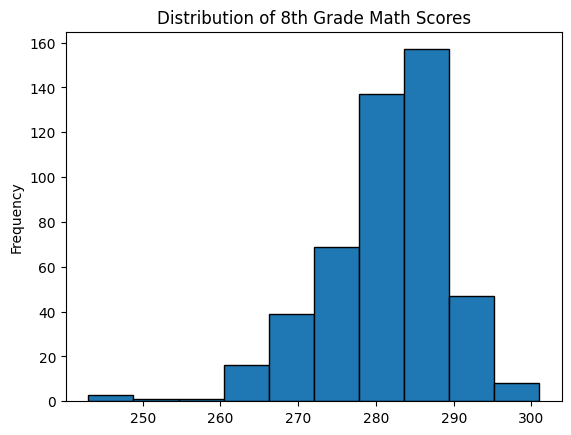

In [12]:
states_edu.AVG_MATH_8_SCORE.plot.hist(title="Distribution of 8th Grade Math Scores", edgecolor="black")


Text(0.5, 1.0, 'avg grade 8 math scores vs. avg grade 8 reading scores')

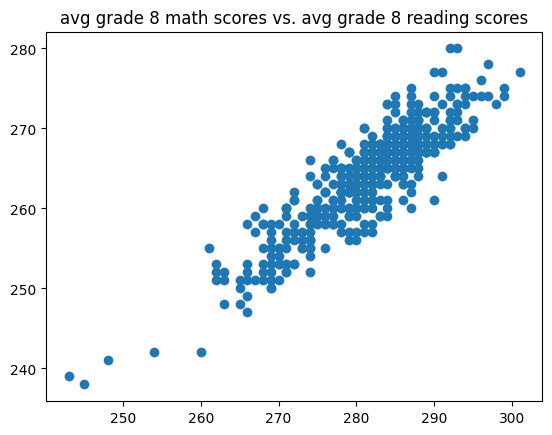

In [16]:
plt.scatter(states_edu['AVG_MATH_8_SCORE'], states_edu['AVG_READING_8_SCORE'])
plt.title("avg grade 8 math scores vs. avg grade 8 reading scores")
# seem to have a positive linear correlation

Text(0.5, 1.0, 'avg grade 8 math scores vs. avg grade 4 math scores')

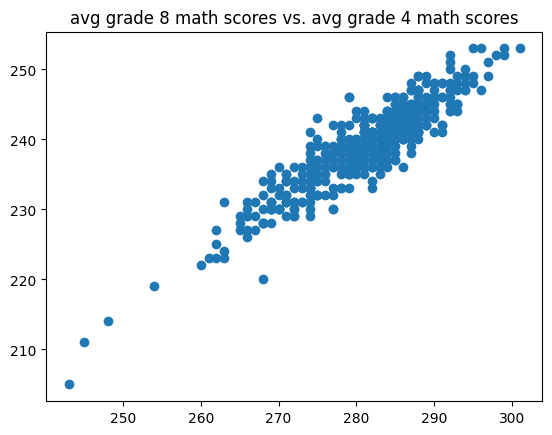

In [17]:
plt.scatter(states_edu['AVG_MATH_8_SCORE'], states_edu['AVG_MATH_4_SCORE'])
plt.title("avg grade 8 math scores vs. avg grade 4 math scores")
# seem to have a positive linear correlation, possible slight curve

In [ ]:
states_edu.AVG_MATH_8_SCORE.plot.hist(title="Distribution of 8th Grade Math Scores", edgecolor="black")

In [39]:
#train/test data
from sklearn.model_selection import train_test_split


In [43]:
X = states_edu[['AVG_MATH_4_SCORE','AVG_READING_8_SCORE']].dropna()
y = states_edu.loc[x.index]['AVG_MATH_8_SCORE']

In [44]:
y.fillna(y.median(), inplace=True)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)


In [46]:
#prediction
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [47]:
model.score(X_test, y_test)


0.8927965845179495

Text(0.5, 1.0, 'Model Behavior On Training Set')

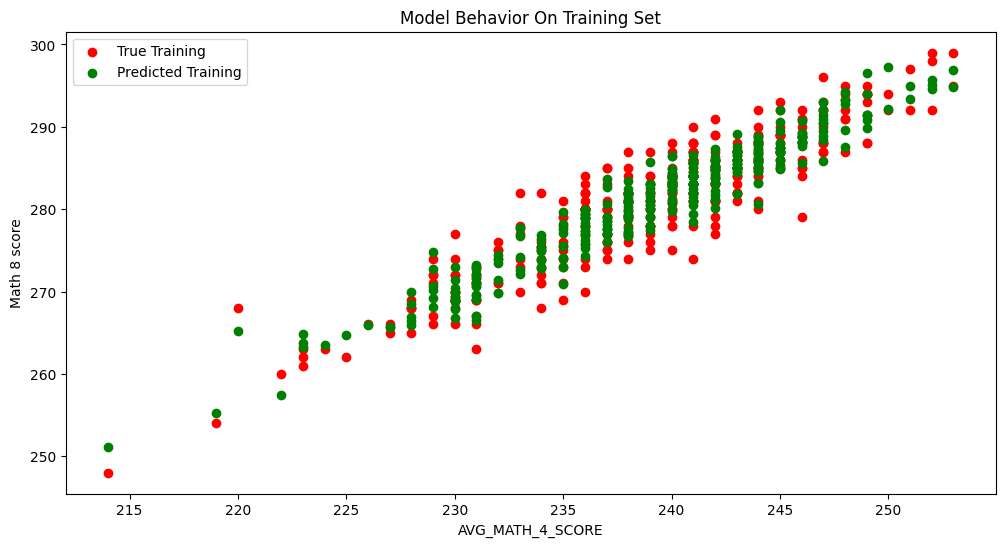

In [49]:
#evaluation
math_4 = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[math_4], y_train, color = "red")
plt.scatter(X_train[math_4], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(math_4)
plt.ylabel('Math 8 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

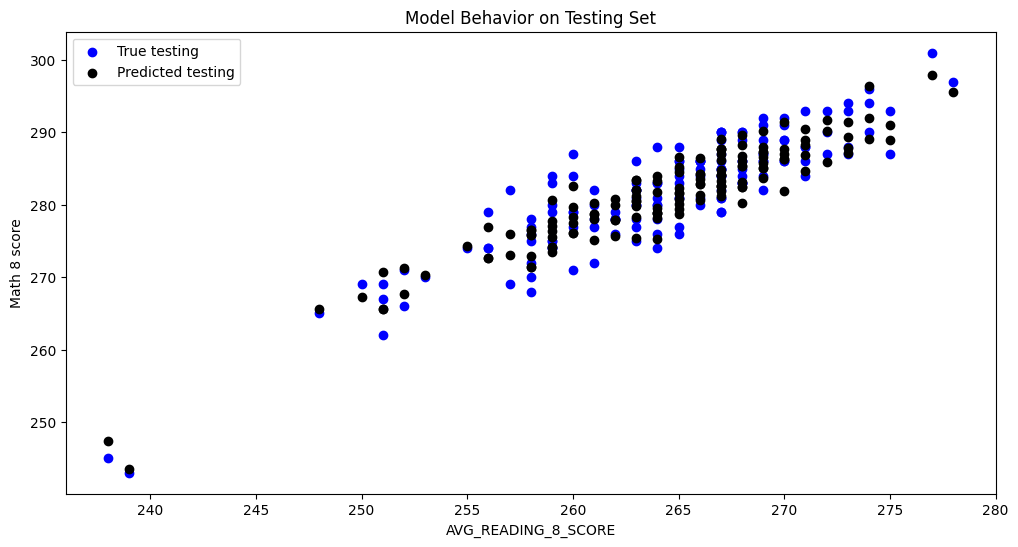

In [50]:
reading_8 = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[reading_8], y_test, color = "blue")
plt.scatter(X_test[reading_8], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(reading_8)
plt.ylabel('Math 8 score')
plt.title("Model Behavior on Testing Set")